# Parkinson's Disease Detection with Machine Learning


Using a dataset, multiple machine learning algorithms are tested in the Coding section of this assignment. Data is collected in order to distinguish between healthy and vulnerable individuals who are suffering from Parkinson's disease (PD).

## Parkinson Disease DataSet
There are 31 biomedical measurements of voice included in this dataset. There are 23 people in this group who have Parkinson's disease.  The attributes in this dataset correspond to a specific voice measurement, and each row corresponds to one of 195 voice recordings. As previously stated, the purpose of this data is to differentiate people with PD from those without PD, by setting the "status" column to 0 for healthy and 1 for people with PD. A combination of an ascii code and a recording number is recorded in the "name" column.

A description of the attributes in the dataset can be found below:

name - ASCII The name of the patient and the recording number

MDVP:Fo(Hz) - The average fundamental frequency of the voice

MDVP:Fhi(Hz) - The maximum fundamental frequency of the voice

MDVP:Flo(Hz) - The minimum fundamental frequency of the voice * 

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Measurements of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - A variety of measures of amplitude variation

NHR,HNR - Indicates the ratio of noise components to tonal components in the voice

status - The patient's state of health (one) - PD, (zero) - healthy

RPDE,D2 - A measure of dynamic complexity that is nonlinear

DFA - Exponent of the signal fractal scaling * spread1,spread2,PPE - Measures 
of fundamental frequency variation that are nonlinear


## Installing neccessary Libraries: 
We need to install some Libraries to be able to use fether in future:

**Featuretools**: An open-source Python library for automated feature engineering. It provides a set of tools and functionalities for automatically generating new features from raw, structured, or time-series data. Featuretools simplifies the process of feature engineering and accelerates the development of machine learning models by automatically creating relevant features.

**CatBoost**: A gradient boosting library for Python that is designed to handle categorical variables efficiently is provided as an open source project. With its state-of-the-art performance, it is capable of performing both classification and regression tasks.
**scikit-learn**: A popular open-source machine learning library for Python is scikit-learn, commonly known as sklearn. A wide range of tools and algorithms are provided for a wide range of machine learning tasks, such as classification, regression, clustering, dimensionality reduction, and model evaluation.
**Optuna**: An open-source hyperparameter optimization library for Python is Optuna. As a result, it provides a framework for automating the search for optimal hyperparameters in machine learning models. In order to efficiently explore the hyperparameter space, Optuna employs a variety of algorithms and strategies, including tree-structured Parzen estimators (TPE) and genetic algorithms.


In [2]:

!pip install sklearn-genetic
!pip install featuretools
!pip install catboost
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 25.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import balanced_accuracy_score,mean_squared_error
from pprint import pprint
import seaborn as sb
import featuretools as ft
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import model_selection
import pickle
import scipy
import statistics as stats
## Lasso search
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
sb.set_style('darkgrid')

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
### Hyperopt imports
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

### optuna imports
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings(action = 'ignore')

## Loading Data

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Parkinsson disease.csv')

# Overview
Using Pandas DataFrame to show first few rows of the dataset which is loaded





In [6]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Renaming columns
- **Improved Readability:** Makes column names clearer and easier to understand.
- **Consistency:** Standardizes feature names, grouping similar attributes under intuitive labels.
- **Ease of Use:** Simplifies referencing columns in code and analysis.
- **Data Analysis:** Helps quickly identify and analyze key features in voice and speech data.

Frequency Features:

`avg_fre`: Average fundamental frequency (MDVP:Fo).

`max_fre`: Maximum fundamental frequency (MDVP:Fhi).

`min_fre`: Minimum fundamental frequency (MDVP:Flo).

`var_fre1` to `var_fre5`: Different jitter metrics representing frequency variation, measured in percentage, absolute value, and specific algorithms like RAP and PPQ.

Amplitude Features:

`var_amp1` to `var_amp6`: Shimmer features representing variations in amplitude, including standard shimmer measures and specific algorithms like APQ3, APQ5, and DDA.


In [15]:
data.rename(columns=({'MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'var_fre1',
       'MDVP:Jitter(Abs)':'var_fre2', 'MDVP:RAP':'var_fre3', 'MDVP:PPQ':'var_fre4', 'Jitter:DDP':'var_fre5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)
data.head()

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data Cleaning

In [16]:
# Dropping Name Column
data.drop('name',1,inplace = True)
data

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [17]:
data.columns.tolist()

['avg_fre',
 'max_fre',
 'min_fre',
 'var_fre1',
 'var_fre2',
 'var_fre3',
 'var_fre4',
 'var_fre5',
 'var_amp1',
 'var_amp2',
 'var_amp3',
 'var_amp4',
 'var_amp5',
 'var_amp6',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [18]:
# check for nulls
data.isna().sum()

avg_fre     0
max_fre     0
min_fre     0
var_fre1    0
var_fre2    0
var_fre3    0
var_fre4    0
var_fre5    0
var_amp1    0
var_amp2    0
var_amp3    0
var_amp4    0
var_amp5    0
var_amp6    0
NHR         0
HNR         0
status      0
RPDE        0
DFA         0
spread1     0
spread2     0
D2          0
PPE         0
dtype: int64

There are no null value in this dataset

In [19]:
# check duplicates and remove it
print("Before removing duplicates:", data.duplicated().sum())

data = data[~data.duplicated()]

print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


<a id='explore'></a>
# Data Exploration

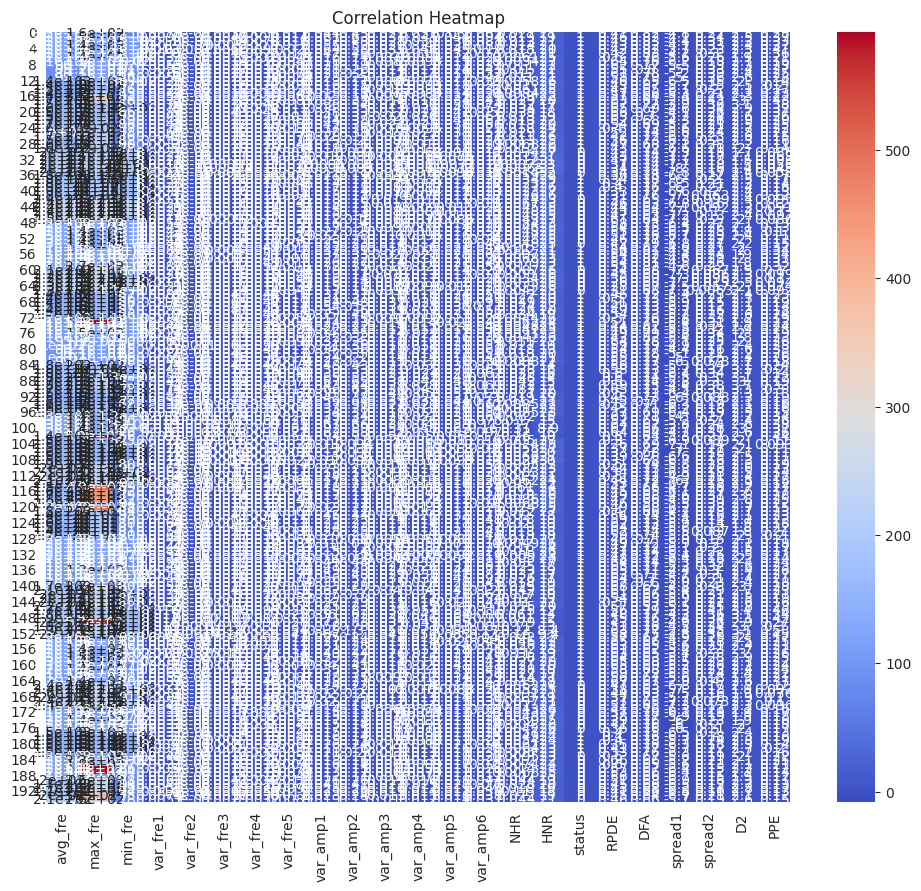

In [21]:
#HeatMap

import seaborn as sns
import matplotlib.pyplot as myplt

myplt.figure(figsize=(12, 10))
sns.heatmap(data, annot=True, cmap='coolwarm')
myplt.title('Correlation Heatmap')
myplt.show()

Checking for imbalanced data

<Axes: xlabel='status', ylabel='count'>

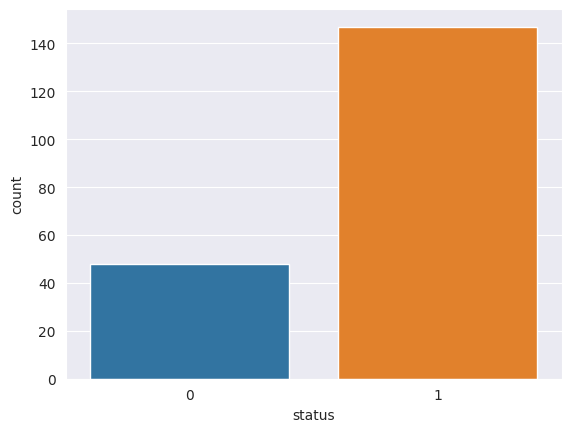

In [22]:
sns.countplot(x="status", data=data)

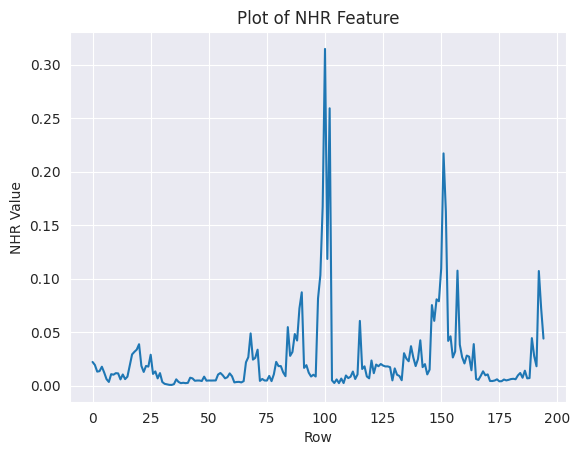

In [23]:

# Extracting the 'NHR' values from the DataFrame
nhr_values = data['NHR']

# Number of rows in the DataFrame
num_rows = data.shape[0]

# Plotting the 'NHR' values
myplt.plot(range(num_rows), nhr_values)
myplt.xlabel('Row')
myplt.ylabel('NHR Value')
myplt.title('Plot of NHR Feature')
myplt.show()

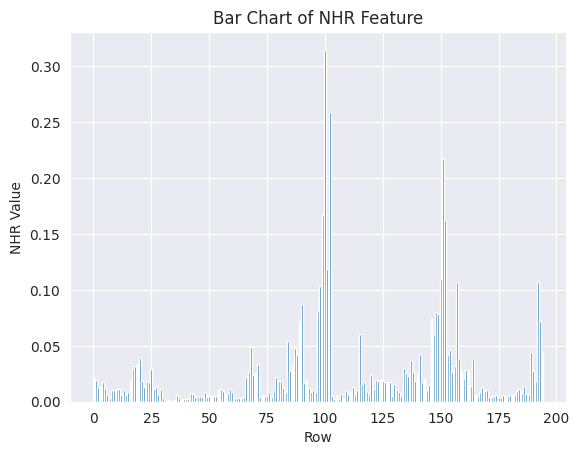

In [24]:
# The bar chart for NHR for all the rows in the dataset
nhr_values = data['NHR']


num_rows = data.shape[0]


myplt.bar(range(num_rows), nhr_values)
myplt.xlabel('Row')
myplt.ylabel('NHR Value')
myplt.title('Bar Chart of NHR Feature')
myplt.show()

In [26]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [27]:
print(str((147/(147+48))*100) + '% of the people whom contributed in the exam have Parkinsons Disease with a ratio of 49:16')

75.38461538461539% of the people whom contributed in the exam have Parkinsons Disease with a ratio of 49:16


In [28]:
# A brief description of the dataset
data.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# `Pre-processing`

Making a copy of data

In [39]:
data_prep = data.copy()

In [40]:
def preprocessing(data,target_ID):
    processedData = convert_categorical_to_numbers(data)
    processedData = auto_data_impute(data)
    processedData = scaling_data(data,target_ID)
    print("Pre-Processing is done")
    return processedData


def convert_categorical_to_numbers(data,unique_val=10):
    """converts nominal object dtypes to numeric  format"""
    obj_df = data.select_dtypes(include=[object])
    unique_list = [f for f in obj_df.columns if obj_df[f].unique().shape[0]>=unique_val]
    obj_df_sel = obj_df.drop(columns=unique_list)
    for col in obj_df_sel.columns:
        data[col] = pd.factorize(data[col])[0]
    print("conversion is done successfully")
    return data

def auto_data_impute(data,get_rid_percent=2):
    for x,y in data.isnull().sum().items():
        percent = y/data.shape[0]
        if percent <= get_rid_percent/100:
            data[x]  = data[x].fillna(data[x].mean())
        else:
            print("removed column : ",x)
            data = data.drop([x],axis=1)
    print("Preporcessing: Data imputation is done successfully")
    return data

def scaling_data(data,target_ID):
    num_df = data.select_dtypes(include = [int,float])
    for i in num_df:
        if i != target_ID:
            data[i] = data[i]/data[i].max()
    print("scaling was successfull")
    return data

We specify the target variable that represents the outcome or the variable we want to predict in machine learning.
In the next snippet code we show the outcome of data

In [41]:
target_ID = 'status'
data = preprocessing(data,target_ID)

conversion is done successfully
Preporcessing: Data imputation is done successfully
scaling was successfull
Pre-Processing is done


In [42]:
data

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.461321,0.265699,0.313572,0.236429,0.269231,0.172575,0.282942,0.172392,0.367316,0.327189,...,0.386318,0.070231,0.636457,1,0.605389,0.987879,1.977391,0.591534,0.626899,0.539765
1,0.470579,0.251085,0.475892,0.291918,0.307692,0.216884,0.355465,0.216695,0.515116,0.480799,...,0.555011,0.061273,0.577511,1,0.668990,0.993012,1.674256,0.744939,0.677404,0.699084
2,0.448596,0.221460,0.466426,0.316647,0.346154,0.253731,0.398876,0.253847,0.439452,0.370200,...,0.488136,0.041579,0.624898,1,0.627446,1.000000,1.825441,0.690739,0.638017,0.630745
3,0.448573,0.232878,0.465635,0.300663,0.346154,0.234142,0.356486,0.233950,0.461203,0.397081,...,0.517707,0.042977,0.624686,1,0.634851,0.992666,1.691639,0.741736,0.655258,0.699655
4,0.446028,0.239483,0.462663,0.387214,0.423077,0.305504,0.463739,0.305612,0.539553,0.448541,...,0.617991,0.056127,0.594577,1,0.609145,0.997814,1.539745,0.520570,0.635271,0.778082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.669683,0.390146,0.394117,0.138420,0.115385,0.122668,0.132278,0.122804,0.343215,0.311060,...,0.413647,0.087796,0.590583,0,0.654511,0.797175,2.686320,0.270708,0.723880,0.252291
191,0.805505,0.427372,0.374161,0.170084,0.115385,0.154384,0.149132,0.154516,0.231021,0.201997,...,0.284028,0.057493,0.579387,0,0.630042,0.827886,2.545294,0.287026,0.758429,0.320261
192,0.671606,0.405393,0.310603,0.410133,0.307692,0.291045,0.288049,0.291155,0.193819,0.196621,...,0.224531,0.340353,0.541138,0,0.594857,0.794490,2.788460,0.351732,0.729953,0.249784
193,0.764168,0.670508,0.313183,0.223160,0.153846,0.172575,0.199183,0.172392,0.192812,0.185100,...,0.223941,0.229433,0.575544,0,0.658572,0.780280,2.770950,0.460504,0.582544,0.233814


# Creating Features:
Next step is to generate Features

In [43]:
def generate_feat(eid,df,feat):
    es = ft.EntitySet(id = eid)
    es.add_dataframe(dataframe_name = eid, dataframe = df, index = 'id')
    es.normalize_dataframe(base_dataframe_name=eid, new_dataframe_name=feat, index = feat)
    feature_matrix, feature_names = ft.dfs(entityset=es, 
    target_dataframe_name = eid, #,'Mean',Std','Count', 'Percent_True', 'Num_Unique', 'Trend', 'Skew'],
    max_depth = 4, 
    verbose = 1,n_jobs=-1)
    feature_matrix = feature_matrix.reindex(index=df['id'])
    return feature_matrix

def creating_features(data,target_ID):
    split_idx=data.shape[0]
    first_level_feat = list(data.columns)
    first_level_feat = [t for t in first_level_feat if target_ID!=t]
    first_level_feat  =first_level_feat[:]
    source = data.drop(target_ID,axis=1)
    source.reset_index(drop=True,inplace=True)
    target = data[[target_ID]]
    target.reset_index(drop=True,inplace=True)
    fmx = []
    for s in first_level_feat:
        out_ = generate_feat(target_ID,source,s)
        fmx.append(out_)
    feature_matrix = pd.concat(fmx,axis=1)
    original_ft_feat = list(feature_matrix.columns)
    feature_matrix = feature_matrix.loc[:,~feature_matrix.columns.duplicated()]
    target.reset_index(drop=True,inplace=True)
    target = target.reindex(index=source['id'])
    feature_matrix = pd.merge(feature_matrix,target,right_index=True,left_index=True)
    feature_matrix = auto_data_impute(feature_matrix,get_rid_percent=10)
    return feature_matrix

In [44]:
def generate_features(entity_id, dataframe, feature_name):
    entity_set = ft.EntitySet(id=entity_id)
    entity_set.add_dataframe(dataframe_name=entity_id, dataframe=dataframe, index='id')
    entity_set.normalize_dataframe(base_dataframe_name=entity_id, new_dataframe_name=feature_name, index=feature_name)
    feature_matrix, feature_names = ft.dfs(entityset=entity_set, 
                                           target_dataframe_name=entity_id,
                                           max_depth=4,
                                           verbose=1, n_jobs=-1)
    feature_matrix = feature_matrix.reindex(index=dataframe['id'])
    return feature_matrix

def create_feature_matrix(data, target_id):
    split_idx = data.shape[0]
    first_level_feat = list(data.columns)
    first_level_feat = [t for t in first_level_feat if target_id != t]
    first_level_feat = first_level_feat[:]
    source = data.drop(target_id, axis=1)
    source.reset_index(drop=True, inplace=True)
    target = data[[target_id]]
    target.reset_index(drop=True, inplace=True)
    feature_matrices = []
    for feat in first_level_feat:
        feature_matrix = generate_features(target_id, source, feat)
        feature_matrices.append(feature_matrix)
    feature_matrix = pd.concat(feature_matrices, axis=1)
    original_feature_names = list(feature_matrix.columns)
    feature_matrix = feature_matrix.loc[:, ~feature_matrix.columns.duplicated()]
    target.reset_index(drop=True, inplace=True)
    target = target.reindex(index=source['id'])
    feature_matrix = pd.merge(feature_matrix, target, right_index=True, left_index=True)
    feature_matrix = auto_data_impute(feature_matrix, get_rid_percent=10)
    return feature_matrix

In [45]:
feature_matrix = create_feature_matrix(data,target_ID)
feature_matrix

Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34953
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40055'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39019'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:46155', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46155
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:55026
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45981', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45981
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:55020
INFO:distributed.scheduler:Receive client connection: Client-d1a41d4e-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-d1a41d4e-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:55034; closing.
INFO:distributed.scheduler:Remove client Client-d1a41d4e-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-d1a41d4e-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40055'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39019'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:55026; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:46155', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:46155
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41843
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45035'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34825'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35033', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35033
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41204
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33157', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33157
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41208
INFO:distributed.scheduler:Receive client connection: Client-d56ba283-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 3 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-d56ba283-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:41216; closing.
INFO:distributed.scheduler:Remove client Client-d56ba283-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-d56ba283-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:45035'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34825'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:41204; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:35033', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:35033
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43297
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42405'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39359'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40137', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40137
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50076
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35827', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35827
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50080
INFO:distributed.scheduler:Receive client connection: Client-d9024357-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-d9024357-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:50084; closing.
INFO:distributed.scheduler:Remove client Client-d9024357-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-d9024357-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42405'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39359'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:50076; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:40137', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:40137
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39323
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45385'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36741'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40461', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40461
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51974
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:46443', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46443
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51984
INFO:distributed.scheduler:Receive client connection: Client-dc25e59f-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 3 seconds
Elapsed: 00:01 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-dc25e59f-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51536; closing.
INFO:distributed.scheduler:Remove client Client-dc25e59f-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-dc25e59f-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:45385'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36741'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51974; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:40461', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:40461
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35841
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33895'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45035'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33575', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33575
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40408
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39371', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39371
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40416
INFO:distributed.scheduler:Receive client connection: Client-e0147ef1-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-e0147ef1-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40426; closing.
INFO:distributed.scheduler:Remove client Client-e0147ef1-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-e0147ef1-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33895'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:45035'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40416; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:39371', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:39371
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37305
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33599'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33473'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40529', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40529
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58204
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36063', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36063
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58220
INFO:distributed.scheduler:Receive client connection: Client-e2e3e1ac-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:01 | Progress:  95%|█████████▌

INFO:distributed.scheduler:Remove client Client-e2e3e1ac-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:58224; closing.
INFO:distributed.scheduler:Remove client Client-e2e3e1ac-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-e2e3e1ac-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33599'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33473'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:58220; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:36063', name: 1, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:36063
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:02 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40805
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36207'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43863'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36451', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36451
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33952
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44805', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44805
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33938
INFO:distributed.scheduler:Receive client connection: Client-e71b9f64-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-e71b9f64-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33964; closing.
INFO:distributed.scheduler:Remove client Client-e71b9f64-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-e71b9f64-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36207'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43863'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33938; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:44805', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:44805
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39921
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37665'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40447'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33385', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33385
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60846
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42251', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42251
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60850
INFO:distributed.scheduler:Receive client connection: Client-ea26c713-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-ea26c713-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60862; closing.
INFO:distributed.scheduler:Remove client Client-ea26c713-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-ea26c713-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37665'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40447'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60846; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:33385', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:33385
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42963
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46423'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33863'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35271', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35271
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:36486
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43105', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43105
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:36478
INFO:distributed.scheduler:Receive client connection: Client-ed43c096-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 3 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-ed43c096-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36498; closing.
INFO:distributed.scheduler:Remove client Client-ed43c096-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-ed43c096-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:46423'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33863'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36486; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:35271', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:35271
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40285
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41345'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39607'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43423', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43423
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:37690
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42229', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42229
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:37700
INFO:distributed.scheduler:Receive client connection: Client-f111910c-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-f111910c-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:37714; closing.
INFO:distributed.scheduler:Remove client Client-f111910c-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-f111910c-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41345'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39607'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:37690; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:43423', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:43423
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39027
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39579'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41695'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38965', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38965
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49402
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42201', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42201
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49414
INFO:distributed.scheduler:Receive client connection: Client-f415eaf7-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:01 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-f415eaf7-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36500; closing.
INFO:distributed.scheduler:Remove client Client-f415eaf7-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-f415eaf7-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39579'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41695'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:49402; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:38965', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:38965
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:03 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38897
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43195'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35209'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34131', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34131
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41506
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42807', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42807
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41512
INFO:distributed.scheduler:Receive client connection: Client-f85ae123-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-f85ae123-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:41518; closing.
INFO:distributed.scheduler:Remove client Client-f85ae123-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-f85ae123-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43195'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35209'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:41506; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:34131', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:34131
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46699
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42271'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39443'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37921', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37921
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40806
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33027', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33027
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40810
INFO:distributed.scheduler:Receive client connection: Client-fb72aba9-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-fb72aba9-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40818; closing.
INFO:distributed.scheduler:Remove client Client-fb72aba9-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-fb72aba9-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42271'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39443'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40810; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:33027', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:33027
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43723
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34835'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38989'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42135', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42135
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38840
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44901', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44901
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38830
INFO:distributed.scheduler:Receive client connection: Client-ff6bc3e3-f87d-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-ff6bc3e3-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38856; closing.
INFO:distributed.scheduler:Remove client Client-ff6bc3e3-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-ff6bc3e3-f87d-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34835'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38989'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:38830; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:44901', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:44901
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34671
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42853'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40603'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38401', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38401
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39628
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41737', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41737
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39642
INFO:distributed.scheduler:Receive client connection: Client-02b0df87-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-02b0df87-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:39646; closing.
INFO:distributed.scheduler:Remove client Client-02b0df87-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-02b0df87-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42853'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40603'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:39628; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:38401', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:38401
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46737
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46393'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36865'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:32961', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:32961
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:47896
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43125', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43125
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:47902
INFO:distributed.scheduler:Receive client connection: Client-05cdedb7-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 4 seconds
Elapsed: 00:01 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-05cdedb7-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:42396; closing.
INFO:distributed.scheduler:Remove client Client-05cdedb7-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-05cdedb7-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:46393'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36865'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47902; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47896; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:43125', name: 1, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms t

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38227
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45169'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45297'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37883', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37883
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40904
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41359', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41359
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40894
INFO:distributed.scheduler:Receive client connection: Client-09c54f70-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-09c54f70-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40920; closing.
INFO:distributed.scheduler:Remove client Client-09c54f70-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-09c54f70-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:45169'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:45297'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40894; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40904; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:41359', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms t

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44765
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35857'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35073'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41085', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41085
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:36980
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34535', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34535
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:36974
INFO:distributed.scheduler:Receive client connection: Client-0cd8fd44-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:01 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-0cd8fd44-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36984; closing.
INFO:distributed.scheduler:Remove client Client-0cd8fd44-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-0cd8fd44-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35857'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35073'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36974; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:34535', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:34535
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:02 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45617
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35641'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37583'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42125', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42125
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33006
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34103', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34103
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33008
INFO:distributed.scheduler:Receive client connection: Client-1103c3fb-f87e-11ed-80a4-0242ac1c000c
INF

2023-05-22 08:53:07,513 featuretools.computational_backend - WARNING    EntitySet was only scattered to 1 out of 2 workers
EntitySet scattered to 1 workers in 2 seconds
Elapsed: 00:01 | Progress:  95%|█████████▌

INFO:distributed.scheduler:Remove client Client-1103c3fb-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33024; closing.
INFO:distributed.scheduler:Remove client Client-1103c3fb-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-1103c3fb-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35641'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37583'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33008; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:34103', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:34103
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44333
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42121'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32809'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34531', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34531
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60942
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39121', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39121
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60954
INFO:distributed.scheduler:Receive client connection: Client-142af2bc-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  47%|████▋     

INFO:distributed.scheduler:Remove client Client-142af2bc-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60966; closing.
INFO:distributed.scheduler:Remove client Client-142af2bc-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-142af2bc-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42121'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:32809'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60942; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:34531', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:34531
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42661
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43573'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36311'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42345', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42345
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33444
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33963', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33963
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33456
INFO:distributed.scheduler:Receive client connection: Client-182ccc05-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 3 seconds
Elapsed: 00:00 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-182ccc05-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:48238; closing.
INFO:distributed.scheduler:Remove client Client-182ccc05-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-182ccc05-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43573'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36311'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:33444; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:42345', name: 0, status: closing, memory: 0, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:42345
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
Built 149 features
Elapsed: 00:00 | Progress:   0%|          

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37385
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42083'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32807'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44159', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44159
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60282
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45331', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45331
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:60296
INFO:distributed.scheduler:Receive client connection: Client-1b7d1e26-f87e-11ed-80a4-0242ac1c000c
INF

EntitySet scattered to 2 workers in 2 seconds
Elapsed: 00:00 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-1b7d1e26-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60298; closing.
INFO:distributed.scheduler:Remove client Client-1b7d1e26-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-1b7d1e26-f87e-11ed-80a4-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42083'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:32807'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:60296; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:45331', name: 0, status: closing, memory: 1, processing: 0>
INFO:distributed.core:Removing comms to tcp://127.0.0.1:45331
INFO:distributed.core:Received 'close-stream' from tcp://12

Elapsed: 00:01 | Progress: 100%|██████████
removed column :  avg_fre.SKEW(status.D2)
removed column :  avg_fre.SKEW(status.DFA)
removed column :  avg_fre.SKEW(status.HNR)
removed column :  avg_fre.SKEW(status.NHR)
removed column :  avg_fre.SKEW(status.PPE)
removed column :  avg_fre.SKEW(status.RPDE)
removed column :  avg_fre.SKEW(status.max_fre)
removed column :  avg_fre.SKEW(status.min_fre)
removed column :  avg_fre.SKEW(status.spread1)
removed column :  avg_fre.SKEW(status.spread2)
removed column :  avg_fre.SKEW(status.var_amp1)
removed column :  avg_fre.SKEW(status.var_amp2)
removed column :  avg_fre.SKEW(status.var_amp3)
removed column :  avg_fre.SKEW(status.var_amp4)
removed column :  avg_fre.SKEW(status.var_amp5)
removed column :  avg_fre.SKEW(status.var_amp6)
removed column :  avg_fre.SKEW(status.var_fre1)
removed column :  avg_fre.SKEW(status.var_fre2)
removed column :  avg_fre.SKEW(status.var_fre3)
removed column :  avg_fre.SKEW(status.var_fre4)
removed column :  avg_fre.SKEW(

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,PPE.SUM(status.var_amp3),PPE.SUM(status.var_amp4),PPE.SUM(status.var_amp5),PPE.SUM(status.var_amp6),PPE.SUM(status.var_fre1),PPE.SUM(status.var_fre2),PPE.SUM(status.var_fre3),PPE.SUM(status.var_fre4),PPE.SUM(status.var_fre5),status
id,,,,,,,,,,,,,,,,,,,,,
0,0.461321,0.265699,0.313572,0.236429,0.269231,0.172575,0.282942,0.172392,0.367316,0.327189,...,0.386400,0.394207,0.215634,0.386318,0.236429,0.269231,0.172575,0.282942,0.172392,1
1,0.470579,0.251085,0.475892,0.291918,0.307692,0.216884,0.355465,0.216695,0.515116,0.480799,...,0.554985,0.569018,0.317027,0.555011,0.291918,0.307692,0.216884,0.355465,0.216695,1
2,0.448596,0.221460,0.466426,0.316647,0.346154,0.253731,0.398876,0.253847,0.439452,0.370200,...,0.488224,0.485894,0.260560,0.488136,0.316647,0.346154,0.253731,0.398876,0.253847,1
3,0.448573,0.232878,0.465635,0.300663,0.346154,0.234142,0.356486,0.233950,0.461203,0.397081,...,0.517797,0.504408,0.273770,0.517707,0.300663,0.346154,0.234142,0.356486,0.233950,1
4,0.446028,0.239483,0.462663,0.387214,0.423077,0.305504,0.463739,0.305612,0.539553,0.448541,...,0.618027,0.607683,0.324067,0.617991,0.387214,0.423077,0.305504,0.463739,0.305612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.669683,0.390146,0.394117,0.138420,0.115385,0.122668,0.132278,0.122804,0.343215,0.311060,...,0.413671,0.314610,0.199231,0.413647,0.138420,0.115385,0.122668,0.132278,0.122804,0
191,0.805505,0.427372,0.374161,0.170084,0.115385,0.154384,0.149132,0.154516,0.231021,0.201997,...,0.284045,0.208690,0.136377,0.284028,0.170084,0.115385,0.154384,0.149132,0.154516,0
192,0.671606,0.405393,0.310603,0.410133,0.307692,0.291045,0.288049,0.291155,0.193819,0.196621,...,0.224544,0.171914,0.120990,0.224531,0.410133,0.307692,0.291045,0.288049,0.291155,0


# Feature Matrix Filtering 

In [47]:
def filter_data(feature_matrix,target_ID):
    lasso_feat = select_lasso_optu(feature_matrix,target_ID,objective,n_trials=50)
    lasso_feat  =[t for t in lasso_feat if t != target_ID]
    pearson_feat = select_pearson_feat(feature_matrix,target_ID,thr=0.05) #pearson
    pearson_feat  =[t for t in pearson_feat if t != target_ID]
    lasso_pearson_feats = list(set(pearson_feat).intersection(set(lasso_feat)))
    feats = lasso_pearson_feats+[target_ID]
    return feats

def objective(trial):
    alpha = trial.suggest_uniform('alpha',0.0,2.0)
    X,y,_ = get_data(feature_matrix)
    lasso_model = Lasso(alpha=alpha)
    acc = cross_val_score(lasso_model,X , y,scoring='r2',cv=5).mean()
    acc = -acc
    return acc

def select_lasso_optu(feature_matrix,target_id,objective,n_trials=20):
    X,y,cols = get_data(feature_matrix)
    study = optuna.create_study(direction='minimize')
    study.optimize(objective,n_trials=n_trials)
    lasso_model = Lasso(**study.best_params)
    lasso_model.fit(X,y)
    coeff = np.abs(lasso_model.coef_)
    feats = np.array(cols)[coeff>0].tolist()
    feats = feats+[target_ID]
    return feats

def select_genetic_feat(feature_matrix,target_ID,f_count):
    estimator = DecisionTreeClassifier()
    X,y = feature_matrix.drop(labels=[target_ID],axis=1),feature_matrix[target_ID]
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="accuracy", max_features=f_count,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)

    model = model.fit(X, y)
#     print('Features:', X.columns[model.support_])
    feats = list(X.columns[model.support_])+[target_ID]
    return feats


def get_data(feature_matrix):
    sc = StandardScaler()
    X,y = feature_matrix.drop(labels=[target_ID],axis=1),feature_matrix[target_ID]
    cols = X.columns
    X = sc.fit_transform(X)
    return X,y,cols


def select_pearson_feat(feature_matrix,ID,thr=0.15):
    cols =[]
    for t in feature_matrix.columns:
        try:
            corr,_ = pearsonr(feature_matrix[ID],feature_matrix[t])
            if corr > thr:
                print(corr,t)
                cols.append(t)
        except:
            pass
    return cols

In [48]:
feats = filter_data(feature_matrix,target_ID)
feats

0.2782195982792975 var_fre1
0.3386530980793471 var_fre2
0.2666675565341965 var_fre3
0.2886983466906385 var_fre4
0.2666460942115801 var_fre5
0.3674298598935416 var_amp1
0.3506969057174749 var_amp2
0.34761696522403307 var_amp3
0.3511484359380265 var_amp4
0.36431573922311206 var_amp5
0.3476083545379774 var_amp6
0.18942931888728265 NHR
0.30856725130270324 RPDE
0.23173927276037898 DFA
0.4548421261086427 spread2
0.34023150988036344 D2
0.5310391538731206 PPE
0.34023150988036344 avg_fre.MAX(status.D2)
0.23173927276037898 avg_fre.MAX(status.DFA)
0.18942931888728265 avg_fre.MAX(status.NHR)
0.5310391538731206 avg_fre.MAX(status.PPE)
0.30856725130270324 avg_fre.MAX(status.RPDE)
0.4548421261086427 avg_fre.MAX(status.spread2)
0.3674298598935416 avg_fre.MAX(status.var_amp1)
0.3506969057174749 avg_fre.MAX(status.var_amp2)
0.34761696522403307 avg_fre.MAX(status.var_amp3)
0.3511484359380265 avg_fre.MAX(status.var_amp4)
0.36431573922311206 avg_fre.MAX(status.var_amp5)
0.3476083545379774 avg_fre.MAX(statu

['var_fre1.MAX(status.spread2)',
 'var_amp3.SUM(status.D2)',
 'var_fre3.MAX(status.var_amp3)',
 'var_amp3.SUM(status.DFA)',
 'var_fre5.MEAN(status.spread2)',
 'var_fre2.MAX(status.var_amp2)',
 'var_fre2.SKEW(status.max_fre)',
 'var_amp2.MIN(status.DFA)',
 'spread2.SUM(status.D2)',
 'status']

In [49]:
feature_matrix[feats]

,var_fre1.MAX(status.spread2),var_amp3.SUM(status.D2),var_fre3.MAX(status.var_amp3),var_amp3.SUM(status.DFA),var_fre5.MEAN(status.spread2),var_fre2.MAX(status.var_amp2),var_fre2.SKEW(status.max_fre),var_amp2.MIN(status.DFA),spread2.SUM(status.D2),status
id,,,,,,,,,,
0,0.591534,0.626899,0.386400,0.987879,0.526019,0.370968,0.190994,0.987879,0.626899,1
1,0.744939,0.677404,0.554985,0.993012,0.744939,0.639785,2.290023,0.993012,0.677404,1
2,0.690739,0.638017,0.488224,1.000000,0.690739,0.630568,0.786179,1.000000,0.638017,1
3,0.741736,0.655258,0.517797,0.992666,0.741736,0.630568,0.786179,0.849890,0.655258,1
4,0.520570,0.635271,0.618027,0.997814,0.520570,0.448541,1.997002,0.779518,0.635271,1
...,...,...,...,...,...,...,...,...,...,...
190,0.270708,0.723880,0.413671,0.797175,0.270708,0.592934,1.964771,0.797175,0.723880,0
191,0.287026,0.758429,0.319285,0.827886,0.420425,0.592934,1.964771,0.827886,0.758429,0
192,0.351732,0.729953,0.224544,0.794490,0.351732,0.639785,2.290023,0.794490,0.729953,0


# Splitting and Preprocessing dataset

In [50]:
feature_matrix = feature_matrix[feats]
train_set = feature_matrix.iloc[:135,:]
test_set  = feature_matrix.iloc[135:,:]

In [51]:
x_train = train_set.drop('status',1)
x_test = test_set.drop('status',1)
y_train = train_set['status']
y_test = test_set['status']

In [52]:
for i in x_train.columns:
    print(i)

var_fre1.MAX(status.spread2)
var_amp3.SUM(status.D2)
var_fre3.MAX(status.var_amp3)
var_amp3.SUM(status.DFA)
var_fre5.MEAN(status.spread2)
var_fre2.MAX(status.var_amp2)
var_fre2.SKEW(status.max_fre)
var_amp2.MIN(status.DFA)
spread2.SUM(status.D2)


# Evaluation Metrics

In [54]:
def model_performance(model,x_train = x_train,x_test = x_test,y_train = y_train,y_test = y_test):
    print(f"{model} Performance:\n")
    y_train_pred = cross_val_predict(model,x_train,y_train,cv=4)
    plt.figure(figsize = (10,10))
    sb.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)
    plt.title('Confusion Matrix')
    plt.show()
    print('Precision Score is:',precision_score(y_train,y_train_pred))
    print("Recall Score is:",recall_score(y_train,y_train_pred))
    print("Accuracy Score is:",accuracy_score(y_train,y_train_pred))
    print("Cross Val Score Insample is:",cross_val_score(model,x_train,y_train,cv=4,scoring='accuracy').mean())
    print("Cross Val Score Outsample is:",cross_val_score(model,x_test,y_test,cv=4,scoring='accuracy').mean())

# Classifiers:
This project uses Supervised learning, and Ensemble learning(AdaBoost) approach, a list of classifiers used in this implementation are as follows:
1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. AdaBoost

## 1. Logistic Regression

In [58]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

LogisticRegression() Performance:



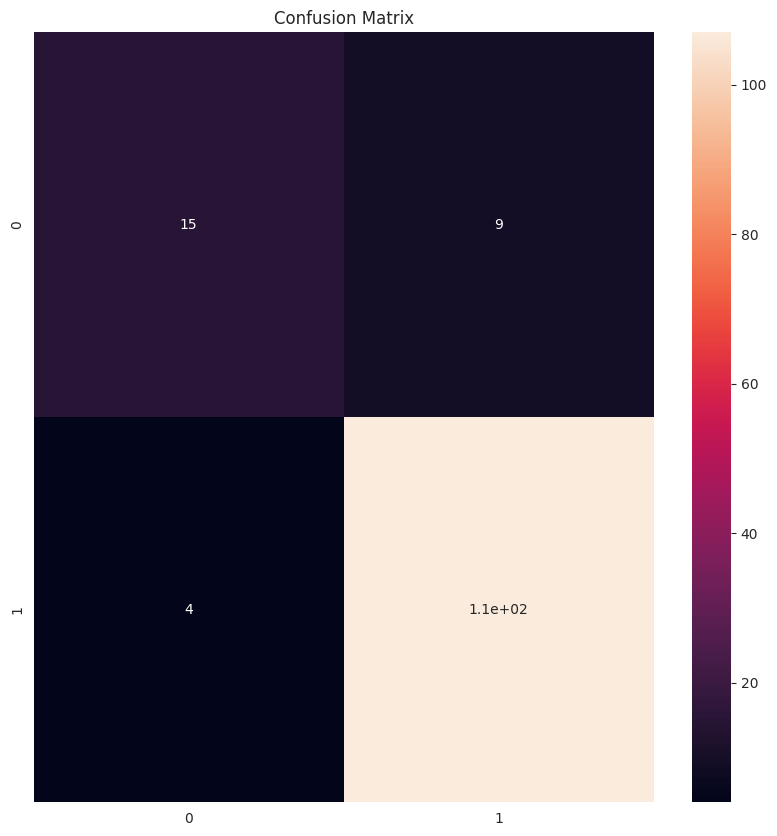

Precision Score is: 0.9224137931034483
Recall Score is: 0.963963963963964
Accuracy Score is: 0.9037037037037037
Cross Val Score Insample is: 0.9039661319073083
Cross Val Score Outsample is: 0.8166666666666667


In [57]:
model_performance(lr_model)

## 2. KNN

In [59]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6) Performance:



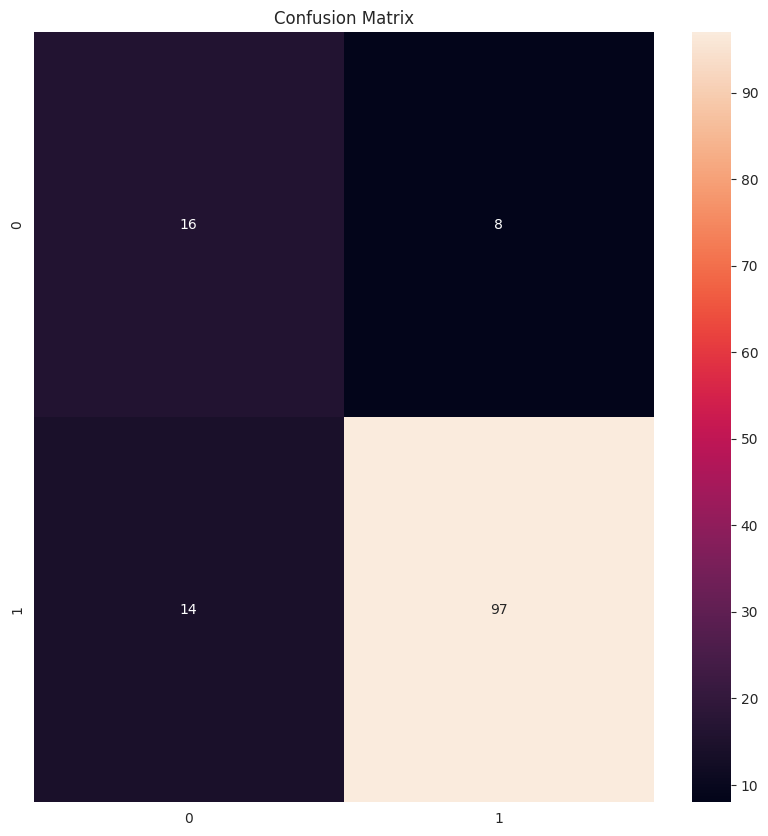

Precision Score is: 0.9238095238095239
Recall Score is: 0.8738738738738738
Accuracy Score is: 0.837037037037037
Cross Val Score Insample is: 0.8375668449197861
Cross Val Score Outsample is: 0.7499999999999999


In [60]:
model_performance(knn_model)

## 3. Decision Tree

In [62]:
dt_model = DecisionTreeClassifier(max_depth = 4,min_samples_split = 2,max_leaf_nodes = 2)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=2)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=2) Performance:



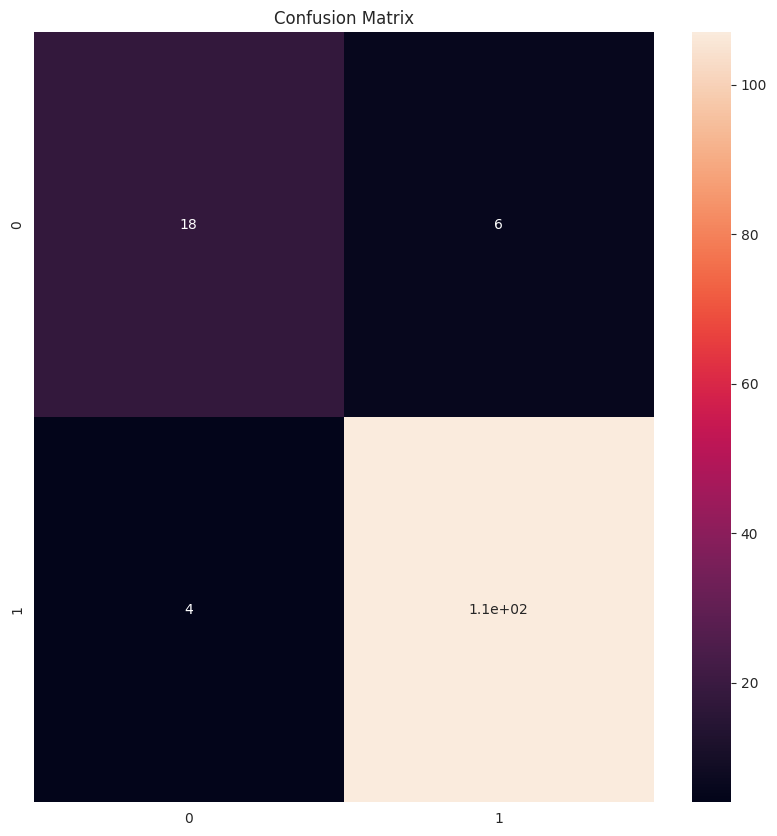

Precision Score is: 0.9469026548672567
Recall Score is: 0.963963963963964
Accuracy Score is: 0.9259259259259259
Cross Val Score Insample is: 0.9262477718360071
Cross Val Score Outsample is: 0.75


In [63]:
model_performance(dt_model)

## 4. Random Forest

In [64]:
rf_model = RandomForestClassifier(max_depth = 5,n_estimators = 1000,criterion = 'gini')
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

RandomForestClassifier(max_depth=5, n_estimators=1000) Performance:



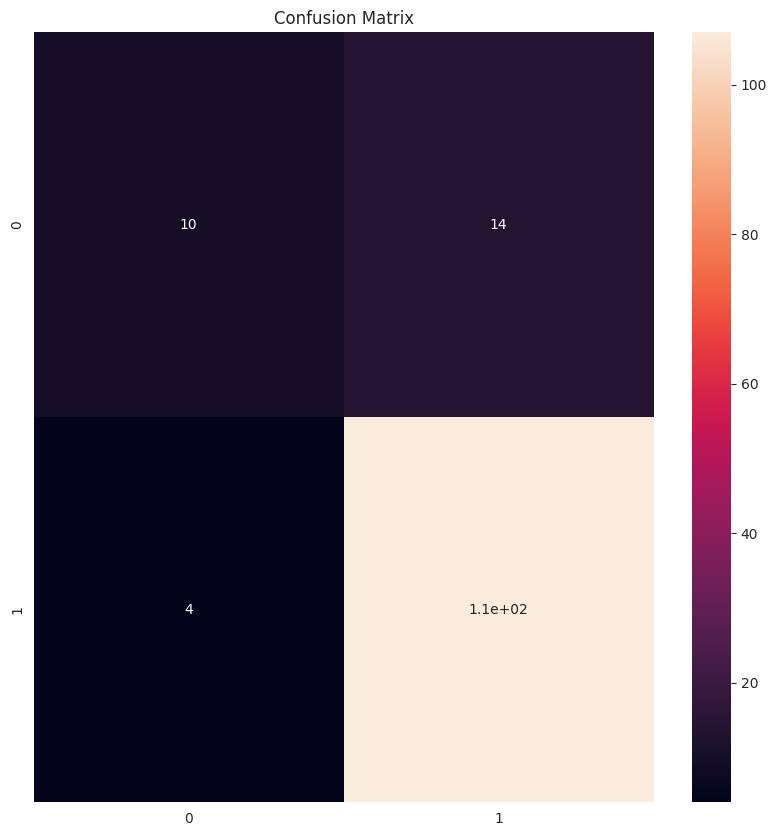

Precision Score is: 0.8842975206611571
Recall Score is: 0.963963963963964
Accuracy Score is: 0.8666666666666667
Cross Val Score Insample is: 0.8672014260249554
Cross Val Score Outsample is: 0.7166666666666667


In [65]:
model_performance(rf_model)

## 5. AdaBoost

In [66]:
ab_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 4,min_samples_split = 2,max_leaf_nodes = 2),n_estimators = 93)
ab_model.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_leaf_nodes=2),
                   n_estimators=93)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_leaf_nodes=2),
                   n_estimators=93) Performance:



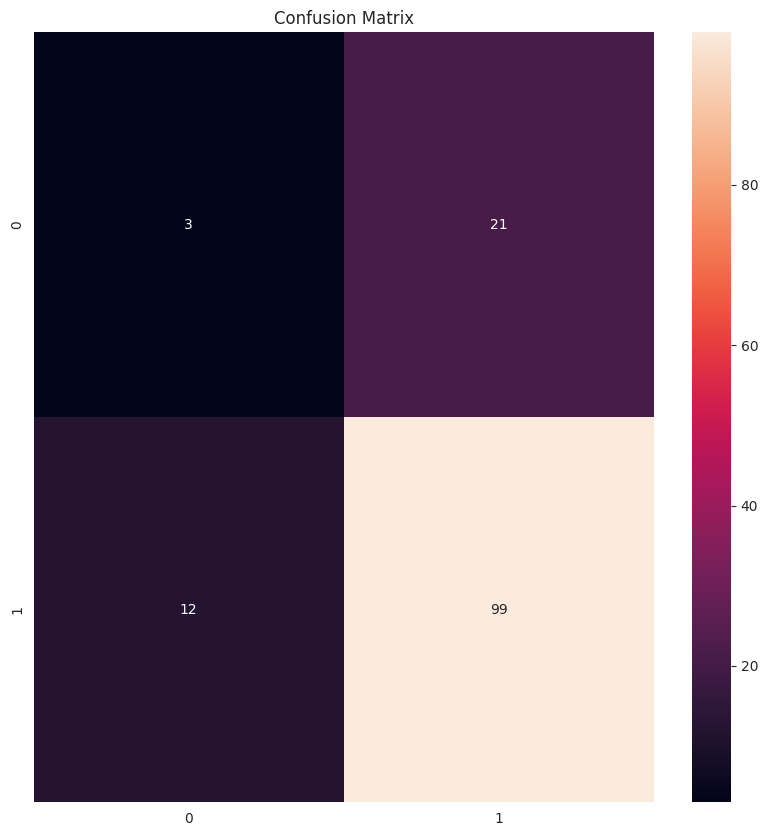

Precision Score is: 0.825
Recall Score is: 0.8918918918918919
Accuracy Score is: 0.7555555555555555
Cross Val Score Insample is: 0.7549019607843137
Cross Val Score Outsample is: 0.7999999999999999


In [67]:
model_performance(ab_model)